In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import re

In [2]:
jobs_df = pd.read_csv('../data/metal_fab_jobs_master_dr.csv')

In [3]:
late = jobs_df.loc[jobs_df.completion_status == 'Late']

In [4]:
late_describe = late.groupby('process_id')['open_close_days'].describe().sort_values('count', ascending = False).reset_index().head(10)

In [5]:
top_10_late_count = late_describe[['process_id', 'count']]
top_10_late_count.columns = ['process_id', 'count_late']

In [6]:
on_time = jobs_df.loc[jobs_df.completion_status != 'Late']

In [7]:
top10_data = on_time.loc[jobs_df['process_id'].isin(late_describe['process_id'])]

In [8]:
on_time_top10 = top10_data.groupby('process_id')['open_close_days'].describe().sort_values('count', ascending = False).reset_index().head(10)

In [9]:
on_time_top10_count = on_time_top10[['process_id', 'count']]
on_time_top10_count.columns = ['process_id', 'count_total']

In [10]:
top10_job_late_vs_on_time = pd.merge(top_10_late_count, on_time_top10_count, 
                               left_on = 'process_id', right_on = 'process_id', 
                               how = 'inner')
top10_job_late_vs_on_time

,process_id,count_late,count_total
0,WRAP,4327.0,9749.0
1,LASER,3744.0,8776.0
2,PB,3354.0,6126.0
3,PCOAT,1906.0,1945.0
4,WELD,1350.0,982.0
5,PUNCH,797.0,952.0
6,XFERR,472.0,238.0
7,PEM,357.0,313.0
8,SAW,291.0,199.0
9,PLATE,257.0,550.0


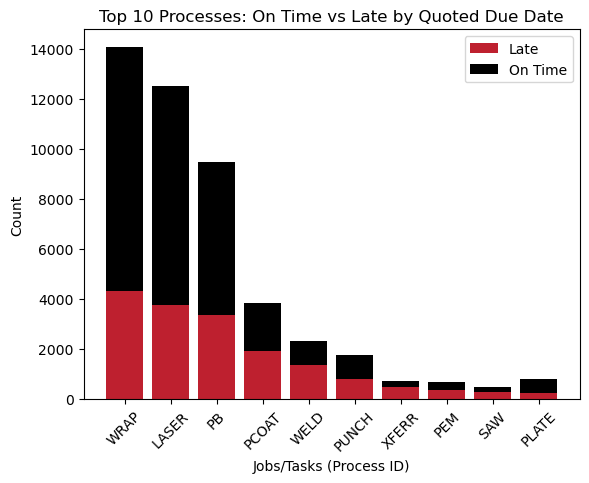

In [11]:
plt.bar(top10_job_late_vs_on_time.process_id, top10_job_late_vs_on_time.count_late, color="#BE202F")
plt.bar(top10_job_late_vs_on_time.process_id, top10_job_late_vs_on_time.count_total, bottom=top10_job_late_vs_on_time.count_late, color='black')
plt.ylabel("Count")
plt.xlabel("Jobs/Tasks (Process ID)")
plt.legend(["Late", "On Time"])
plt.title("Top 10 Processes: On Time vs Late by Quoted Due Date")
plt.xticks(rotation=45)
plt.savefig('top_10_process_total_vs_late.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [12]:
jobs_df.head()

,job_id,short_description,process_id,created_date,production_due_date,completed_date,jmp_part_id,jmp_order_quantity,jmp_production_quantity,open_close_days,due_date_diff,completion_status
0,27563-0004-001,WRAP,WRAP,2023-01-02,2023-02-07,2023-02-21,S039-0304,270.0,270.0,50.0,14.0,Late
1,27559-0004-001,MANUAL PRESS BRAKE,PB,2023-01-02,2023-01-17,2023-01-23,S039-0304,40.0,40.0,21.0,6.0,Late
2,27559-0004-001,WRAP,WRAP,2023-01-02,2023-01-17,2023-01-23,S039-0304,40.0,40.0,21.0,6.0,Late
3,27560-0001-001,LASER CUTTING,LASER,2023-01-02,2023-01-24,2023-01-23,S039-0302,50.0,50.0,21.0,-1.0,On-time
4,27560-0001-001,MANUAL PRESS BRAKE,PB,2023-01-02,2023-01-24,2023-01-23,S039-0302,50.0,50.0,21.0,-1.0,On-time


In [13]:
late2 = jobs_df.loc[jobs_df.completion_status == 'Late']

In [14]:
late_describe2 = late2.groupby('jmp_part_id')['open_close_days'].describe().sort_values('count', ascending = False).reset_index().head(10)

In [15]:
top_10_late_count2 = late_describe2[['jmp_part_id', 'count']]
top_10_late_count2.columns = ['jmp_part_id', 'count_late']

In [16]:
on_time2 = jobs_df.loc[jobs_df.completion_status != 'Late']

In [17]:
top10_data2 = on_time2.loc[jobs_df['jmp_part_id'].isin(late_describe2['jmp_part_id'])]

In [18]:
on_time_top102 = top10_data2.groupby('jmp_part_id')['open_close_days'].describe().sort_values('count', ascending = False).reset_index().head(10)

In [19]:
on_time_top10_count2 = on_time_top102[['jmp_part_id', 'count']]
on_time_top10_count2.columns = ['jmp_part_id', 'count_total']

In [20]:
top10_job_late_vs_on_time2 = pd.merge(top_10_late_count2, on_time_top10_count2, 
                               left_on = 'jmp_part_id', right_on = 'jmp_part_id', 
                               how = 'inner')
top10_job_late_vs_on_time2

,jmp_part_id,count_late,count_total
0,S025-0508,590.0,183.0
1,Y002-0631,380.0,43.0
2,Y002-0604,350.0,40.0
3,F022-0009,226.0,0.0
4,A045-0015,210.0,39.0
5,B035-0002-KIT,207.0,4.0
6,B035-0001-KIT,207.0,4.0
7,Y002-0605,185.0,15.0
8,F019-0015,117.0,48.0
9,M030-0317,104.0,124.0


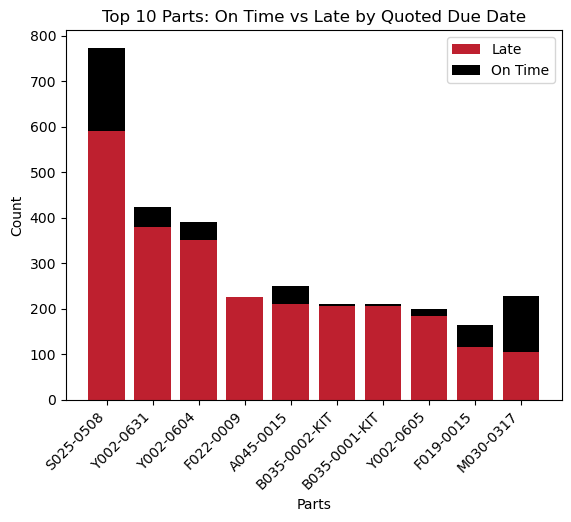

In [21]:
plt.bar(top10_job_late_vs_on_time2.jmp_part_id, top10_job_late_vs_on_time2.count_late, color="#BE202F")
plt.bar(top10_job_late_vs_on_time2.jmp_part_id, top10_job_late_vs_on_time2.count_total, bottom=top10_job_late_vs_on_time2.count_late, color='black')
plt.ylabel("Count")
plt.xlabel("Parts")
plt.legend(["Late", "On Time"])
plt.title("Top 10 Parts: On Time vs Late by Quoted Due Date")
plt.xticks(rotation=45, ha = 'right')
plt.savefig('top_10_part_total_vs_late.png', bbox_inches = 'tight', transparent=True)
plt.show()